### Singapore race Analysis:2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

### Constructor csv

In [4]:
df_constructor_standings=pd.read_csv('./Capstone_core_data/constructor_standings.csv',index_col=0)

In [5]:
df_constructor_standings.columns=['raceId', 'constructorId', 'con_points', 'con_position', 'positionText',
       'Conwins']

In [6]:
df_constructor_standings=df_constructor_standings[['raceId','constructorId', 'con_points',
       'con_position', 'Conwins']]

In [7]:
df_constructor_standings.shape

(12316, 5)

### Final csv(driver standings with age,results who participated only in Australian season)

In [8]:
df_final=pd.read_csv('./intermediate_files/results_of driver_standings_singapore_race.csv',index_col=0)

In [9]:
df_final.shape

(258, 15)

### Merge:1

### driver standings merged with constructor standings

In [10]:
df_final_constructor_Standings=pd.merge(df_final,df_constructor_standings, how='inner', on=['raceId','constructorId'])

In [11]:
df_final_constructor_Standings.shape

(258, 18)

In [12]:
df_final_constructor_Standings.columns

Index(['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'race_name', 'constructorId', 'starting_grid',
       'Ending_position', 'points_scored', 'laps_completed', 'statusId',
       'D_age', 'con_points', 'con_position', 'Conwins'],
      dtype='object')

In [13]:
df_final_constructor_Standings.to_csv('./intermediate_files/df_final_constructor_Standings.csv')

### Bringing weather information

### Singapore weather stored in a file using web scraping

In [14]:
df_weather=pd.read_csv('./Capstone_core_data/singapore_weather.csv')

In [15]:
df_weather.columns=['visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'date', 'name']

In [16]:
df_races=pd.read_csv('./Capstone_core_data/races.csv')

In [17]:
df_races.head(2)

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...


In [18]:
df_race_sing=pd.read_csv('./intermediate_files/df_race_sing.csv',index_col=0)

In [19]:
df_race_sing.head(2)

,raceId,year,round,name
13,14,2009,14,Singapore Grand Prix
31,32,2008,15,Singapore Grand Prix


In [20]:
df_race_sing.shape

(13, 4)

In [21]:
df_weather.columns

Index(['visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'date', 'name'],
      dtype='object')

In [22]:
df_weather.columns=['visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'year', 'name']

In [23]:
df_weather.head(2)

,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,year,name
0,6.167,90.72,77.47,5.06,152,0.79,2008,Singapore Grand Prix
1,5.380,92.29,81.09,6.34,188,0.74,2009,Singapore Grand Prix


### Merge:2

In [24]:
df_weather_sing=pd.merge(df_race_sing,df_weather,how='left',on='year')

In [25]:
df_weather_sing.to_csv('./intermediate_files/df_weather_sing.csv')

In [26]:
df_weather_sing.columns

Index(['raceId', 'year', 'round', 'name_x', 'visibility', 'temperatureHigh',
       'temperatureLow', 'windSpeed', 'windBearing', 'humidity', 'name_y'],
      dtype='object')

In [27]:
df_weather_sing=df_weather_sing.drop(['name_y'],axis=1)

In [28]:
df_weather_sing.shape

(13, 10)

In [29]:
df_weather_sing.columns=['raceId', 'race_year', 'round', 'name','visibility', 'temperatureHigh', 'temperatureLow',
       'windSpeed', 'windBearing', 'humidity']

In [30]:
df_weather_sing.head(2)

,raceId,race_year,round,name,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity
0,14,2009,14,Singapore Grand Prix,5.380,92.29,81.09,6.34,188.0,0.74
1,32,2008,15,Singapore Grand Prix,6.167,90.72,77.47,5.06,152.0,0.79


In [31]:
df_final_constructor_Standings.head(2)

,raceId,driverId,D_points,D-position,D_wins,race_year,race_round,race_name,constructorId,starting_grid,Ending_position,points_scored,laps_completed,statusId,D_age,con_points,con_position,Conwins
0,32,1,84.0,1,4,2008,15,Singapore Grand Prix,1,2,3,6.0,61,1,35,135.0,1,5
1,32,5,51.0,6,1,2008,15,Singapore Grand Prix,1,5,10,0.0,61,1,38,135.0,1,5


### Merge:3

In [32]:
df_weather_constructor=pd.merge(df_final_constructor_Standings,df_weather_sing,how='inner', on=['raceId','race_year'])

In [33]:
df_weather_constructor.to_csv('./intermediate_files/test.csv')

In [34]:
df_weather_constructor.assign(Top_15_position= " ")

,raceId,driverId,D_points,D-position,D_wins,race_year,race_round,race_name,constructorId,starting_grid,...,Conwins,round,name,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,Top_15_position
0,32,1,84.0,1,4,2008,15,Singapore Grand Prix,1,2,...,5,15,Singapore Grand Prix,6.167,90.72,77.47,5.06,152.0,0.79,
1,32,5,51.0,6,1,2008,15,Singapore Grand Prix,1,5,...,5,15,Singapore Grand Prix,6.167,90.72,77.47,5.06,152.0,0.79,
2,32,2,56.0,5,0,2008,15,Singapore Grand Prix,2,9,...,1,15,Singapore Grand Prix,6.167,90.72,77.47,5.06,152.0,0.79,
3,32,9,64.0,3,1,2008,15,Singapore Grand Prix,2,4,...,1,15,Singapore Grand Prix,6.167,90.72,77.47,5.06,152.0,0.79,
4,32,3,17.0,12,0,2008,15,Singapore Grand Prix,3,8,...,0,15,Singapore Grand Prix,6.167,90.72,77.47,5.06,152.0,0.79,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,1024,842,69.0,6,0,2019,15,Singapore Grand Prix,5,11,...,0,15,Singapore Grand Prix,10.000,90.34,79.85,10.33,121.0,0.79,
254,1024,846,31.0,12,0,2019,15,Singapore Grand Prix,1,9,...,0,15,Singapore Grand Prix,10.000,90.34,79.85,10.33,121.0,0.79,
255,1024,832,58.0,7,0,2019,15,Singapore Grand Prix,1,7,...,0,15,Singapore Grand Prix,10.000,90.34,79.85,10.33,121.0,0.79,
256,1024,847,0.0,20,0,2019,15,Singapore Grand Prix,3,18,...,0,15,Singapore Grand Prix,10.000,90.34,79.85,10.33,121.0,0.79,


In [35]:
df_weather_constructor['Top_15_position'] = np.where(df_weather_constructor.Ending_position <=12,1,0)

In [36]:
df_weather_constructor['Top_15_position'].value_counts()

1    144
0    114
Name: Top_15_position, dtype: int64

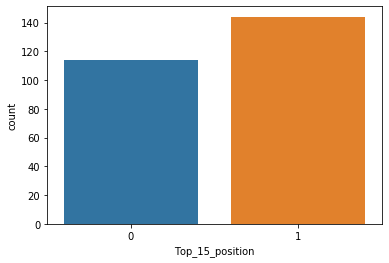

In [37]:
sns.countplot(df_weather_constructor['Top_15_position'])

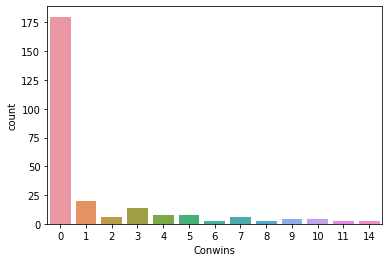

In [38]:
sns.countplot(df_weather_constructor['Conwins'])

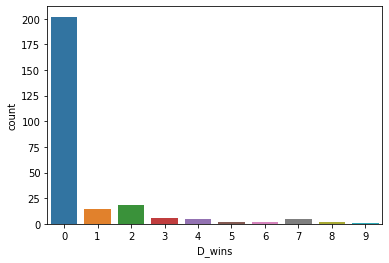

In [39]:
sns.countplot(df_weather_constructor['D_wins'])

In [40]:
df_weather_constructor['D_wins'].unique()

array([4, 1, 0, 2, 5, 6, 3, 9, 7, 8])

In [41]:
df_weather_constructor.loc[(df_weather_constructor.D_wins>=1),'D_wins']=1

In [42]:
df_weather_constructor['D_wins'].unique()

array([1, 0])

In [43]:
df_weather_constructor['Conwins'].unique()

array([ 5,  1,  0,  7,  8,  3,  2,  6,  4,  9, 11, 10, 14])

In [44]:
df_weather_constructor.loc[(df_weather_constructor.Conwins>=1),'Conwins']=1

In [45]:
df_weather_constructor['Conwins'].unique()

array([1, 0])

In [46]:
df_weather_constructor.to_csv('./intermediate_files/singalore_weather_constructor.csv')

### Changing the order of the columns

In [47]:
df_weather_constructor=df_weather_constructor[['raceId', 'driverId', 'D_points', 'D_wins', 'race_year', 
                                               'race_round',
       'race_name', 'constructorId', 'starting_grid', 'Ending_position',
       'points_scored', 'laps_completed', 'statusId', 'D_age', 'con_points',
       'con_position', 'Conwins', 'visibility', 'temperatureHigh',
       'temperatureLow', 'windSpeed', 'windBearing', 'humidity',
       'Top_15_position']]

In [48]:
df_weather_constructor.head()

,raceId,driverId,D_points,D_wins,race_year,race_round,race_name,constructorId,starting_grid,Ending_position,...,con_points,con_position,Conwins,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,Top_15_position
0,32,1,84.0,1,2008,15,Singapore Grand Prix,1,2,3,...,135.0,1,1,6.167,90.72,77.47,5.06,152.0,0.79,1
1,32,5,51.0,1,2008,15,Singapore Grand Prix,1,5,10,...,135.0,1,1,6.167,90.72,77.47,5.06,152.0,0.79,1
2,32,2,56.0,0,2008,15,Singapore Grand Prix,2,9,6,...,120.0,3,1,6.167,90.72,77.47,5.06,152.0,0.79,1
3,32,9,64.0,1,2008,15,Singapore Grand Prix,2,4,11,...,120.0,3,1,6.167,90.72,77.47,5.06,152.0,0.79,1
4,32,3,17.0,0,2008,15,Singapore Grand Prix,3,8,2,...,26.0,8,0,6.167,90.72,77.47,5.06,152.0,0.79,1


In [47]:
pip install sklearn

/opt/anaconda3/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
corr = df_weather_constructor.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,raceId,driverId,D_points,D_wins,race_year,race_round,constructorId,starting_grid,Ending_position,points_scored,laps_completed,statusId,D_age,con_points,con_position,Conwins,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,Top_15_position
raceId,1,0.49,0.18,-0.1,0.83,-0.23,0.21,0.0095,0.0095,0.14,0.042,0.081,-0.47,0.18,0.0095,-0.11,0.25,-0.1,-0.17,0.38,-0.054,0.14,-0.0073
driverId,0.49,1,-0.29,-0.3,0.51,-0.045,0.03,0.25,0.13,-0.2,0.097,-0.053,-0.74,-0.28,0.29,-0.35,0.22,-0.13,0.07,0.29,-0.084,0.091,-0.075
D_points,0.18,-0.29,1,0.73,0.17,0.015,-0.075,-0.69,-0.56,0.78,0.099,-0.16,0.057,0.96,-0.79,0.72,0.084,-0.065,0.0015,0.056,-0.021,0.0039,0.4
D_wins,-0.1,-0.3,0.73,1,-0.077,0.028,-0.075,-0.6,-0.45,0.59,0.1,-0.15,0.083,0.66,-0.63,0.8,0.022,-0.011,0.028,0.021,-0.027,0.029,0.3
race_year,0.83,0.51,0.17,-0.077,1,0.077,0.097,-0.052,-0.052,0.13,0.021,0.044,-0.59,0.17,-0.052,-0.098,0.55,-0.29,0.22,0.59,-0.22,0.27,0.032
race_round,-0.23,-0.045,0.015,0.028,0.077,1,-0.093,-0.0035,-0.0035,-0.024,0.002,-0.052,-0.028,0.012,-0.0035,0.0077,0.57,-0.36,-0.1,-0.03,0.22,0.29,0.003
constructorId,0.21,0.03,-0.075,-0.075,0.097,-0.093,1,0.35,0.26,-0.12,-0.026,0.17,0.019,-0.078,0.31,-0.13,-0.024,0.002,-0.068,-0.016,0.049,-0.057,-0.29
starting_grid,0.0095,0.25,-0.69,-0.6,-0.052,-0.0035,0.35,1,0.56,-0.61,-0.091,0.15,-0.031,-0.69,0.78,-0.62,-0.042,0.031,-0.076,-0.074,0.07,-0.056,-0.46
Ending_position,0.0095,0.13,-0.56,-0.45,-0.052,-0.0035,0.26,0.56,1,-0.79,-0.63,0.37,0.061,-0.53,0.59,-0.43,-0.042,0.031,-0.076,-0.074,0.07,-0.056,-0.86
points_scored,0.14,-0.2,0.78,0.59,0.13,-0.024,-0.12,-0.61,-0.79,1,0.3,-0.24,-0.014,0.72,-0.61,0.57,0.042,-0.035,0.0026,0.04,-0.024,-0.0075,0.57


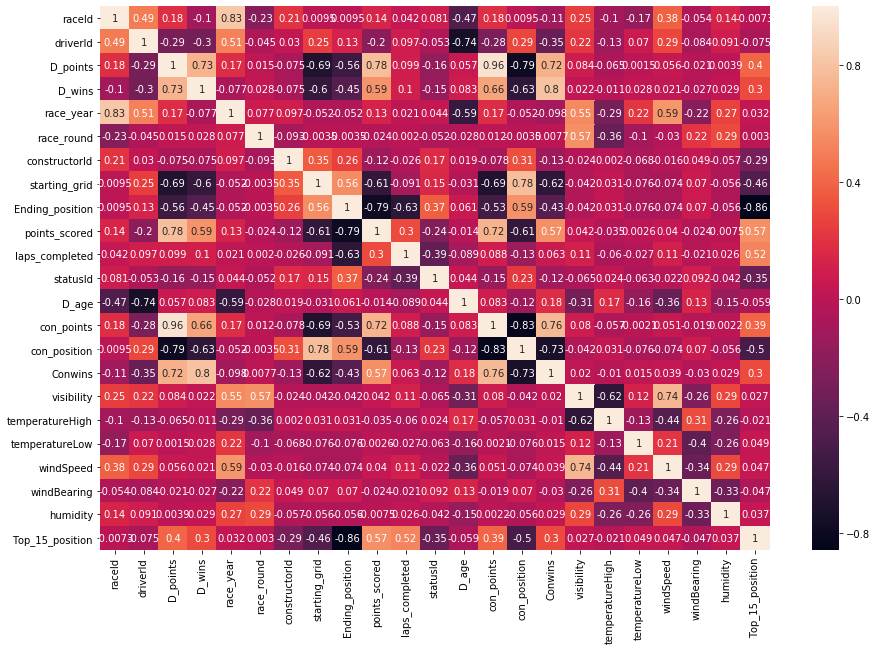

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df_weather_constructor.corr(), annot=True)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

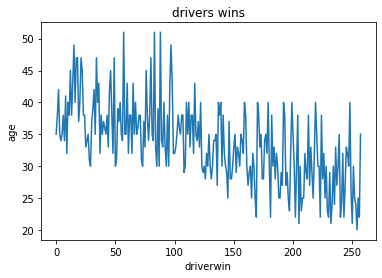

In [52]:
plt.figure()
plt.plot(df_weather_constructor['D_age']) 
plt.title('drivers wins') # adding a title
plt.ylabel('age') # adding a label for the y-axis
plt.xlabel('driverwin') # adding a label for the x-axis 
plt.show() 

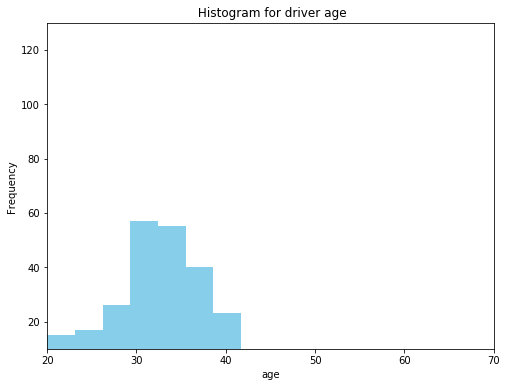

In [55]:
plt.figure(figsize=(8,6))
plt.hist(df_weather_constructor['D_age'], color = "skyblue", lw=0,bins=10)
plt.xlabel('age')
plt.ylim(10,130)
plt.xlim(20,70)
plt.ylabel('Frequency')
plt.title(' Histogram for driver age')
plt.show()

In [56]:
df_weather_constructor.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
raceId,258.0,738.945736,353.702711,14.000,854.000,893.000,962.000,1024.00
driverId,258.0,380.062016,396.927465,1.000,13.000,153.000,820.000,848.00
D_points,258.0,59.699612,73.433245,0.000,6.000,30.000,80.750,309.00
D_wins,258.0,0.217054,0.413041,0.000,0.000,0.000,0.000,1.00
race_year,258.0,2013.403101,3.390349,2008.000,2011.000,2013.000,2016.000,2019.00
race_round,258.0,14.248062,0.717009,13.000,14.000,14.000,15.000,15.00
constructorId,258.0,52.341085,78.094076,1.000,4.000,9.000,131.000,211.00
starting_grid,258.0,11.313953,6.324423,1.000,6.000,11.000,17.000,24.00
Ending_position,258.0,11.313953,6.324423,1.000,6.000,11.000,17.000,24.00
points_scored,258.0,4.217054,6.634377,0.000,0.000,0.000,6.000,25.00


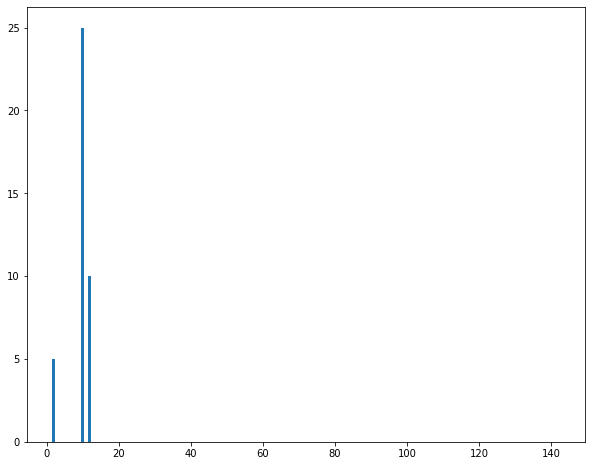

In [57]:
plt.figure(figsize=(10.0, 8.0))
plt.bar(df_weather_constructor['points_scored'].value_counts().values,df_weather_constructor['points_scored'].value_counts().index)
plt.show()

In [58]:
for i in df_weather_constructor.columns:
    df_top10=pd.DataFrame(df_weather_constructor[i].value_counts()).head(2)
    display(df_top10)

,raceId
873,24
351,24


,driverId
1,12
20,12


,D_points
0.0,46
8.0,8


,D_wins
0,202
1,56


,race_year
2012,24
2011,24


,race_round
14,110
15,106


,race_name
Singapore Grand Prix,258


,constructorId
1,24
3,24


,starting_grid
12,12
11,12


,Ending_position
12,12
11,12


,points_scored
0.0,142
2.0,12


,laps_completed
61,104
60,49


,statusId
1,147
11,34


,D_age
30,33
38,30


,con_points
0.0,32
26.0,8


,con_position
10,24
9,24


,Conwins
0,180
1,78


,visibility
6.104,24
6.037,24


,temperatureHigh
91.99,24
90.61,24


,temperatureLow
79.58,24
77.78,24


,windSpeed
2.21,24
5.29,24


,windBearing
197.0,24
175.0,24


,humidity
0.76,108
0.72,46


,Top_15_position
1,144
0,114


In [59]:
df_weather_constructor.columns

Index(['raceId', 'driverId', 'D_points', 'D_wins', 'race_year', 'race_round',
       'race_name', 'constructorId', 'starting_grid', 'Ending_position',
       'points_scored', 'laps_completed', 'statusId', 'D_age', 'con_points',
       'con_position', 'Conwins', 'visibility', 'temperatureHigh',
       'temperatureLow', 'windSpeed', 'windBearing', 'humidity',
       'Top_15_position'],
      dtype='object')

In [60]:
df_target = df_weather_constructor['D_wins']
df_p_columns = df_weather_constructor[['raceId', 'driverId', 'D_points','race_year', 'race_round',
       'constructorId', 'starting_grid', 'Ending_position',
       'points_scored', 'laps_completed', 'statusId', 'D_age', 'con_points',
       'con_position', 'Conwins', 'visibility', 'temperatureHigh',
       'temperatureLow', 'windSpeed', 'windBearing', 'humidity',
       'Top_15_position']]

In [61]:
p_value_f1_race=[]

for i in df_p_columns.columns:
    
    p_value=stats.pearsonr(df_p_columns[i],df_target)
    
    p_value_f1_race.append(p_value)

In [62]:
df=pd.DataFrame(p_value_f1_race, columns = ['correlation coefficient','p_value'])
df

,correlation coefficient,p_value
0,-0.101847,1.026353e-01
1,-0.299006,9.991716e-07
2,0.728708,5.515630e-44
3,-0.076617,2.200204e-01
4,0.027703,6.578366e-01
5,-0.075044,2.296630e-01
6,-0.599662,1.389336e-26
7,-0.446239,4.980736e-14
8,0.593319,6.313364e-26
9,0.102972,9.887359e-02


In [63]:
percentage_missing = df_weather_constructor.isnull().sum() * 100 / len(df_weather_constructor)
missing_value_df = pd.DataFrame({'column_name': df_weather_constructor.columns,
                                 'percentage_missing': percentage_missing})

missing_value_df

,column_name,percentage_missing
raceId,raceId,0.0
driverId,driverId,0.0
D_points,D_points,0.0
D_wins,D_wins,0.0
race_year,race_year,0.0
race_round,race_round,0.0
race_name,race_name,0.0
constructorId,constructorId,0.0
starting_grid,starting_grid,0.0
Ending_position,Ending_position,0.0


In [64]:
#df_weather_constructor=df_weather_constructor.drop([ 'D_wins'],axis=1)

In [65]:
 df_weather_constructor.dtypes

raceId               int64
driverId             int64
D_points           float64
D_wins               int64
race_year            int64
race_round           int64
race_name           object
constructorId        int64
starting_grid        int64
Ending_position      int64
points_scored      float64
laps_completed       int64
statusId             int64
D_age                int64
con_points         float64
con_position         int64
Conwins              int64
visibility         float64
temperatureHigh    float64
temperatureLow     float64
windSpeed          float64
windBearing        float64
humidity           float64
Top_15_position      int64
dtype: object

### Go to singapore_race ML Notebook